<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/5%20-%20Reti%20Neurali/neuralnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reti Neurali - il Multilayer Perceptron

### Importiamo i moduli

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Definiamo le costanti

In [18]:
RANDOM_SEED = 0

### Definiamo le funzioni

In [19]:
def plot_decision_boundary(model, data, sv=None):
    
    X, Y = data
    h = .02 

    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')

### Generiamo i dati

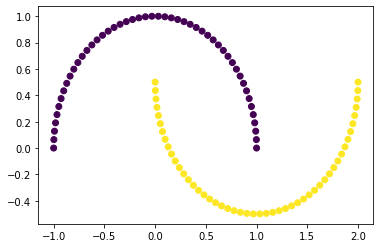

In [4]:
X, y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=RANDOM_SEED)
plt.scatter(X[:,0], X[:,1], c=y)

### Processiamo i dati

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [14]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### Regressione Logistica

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8

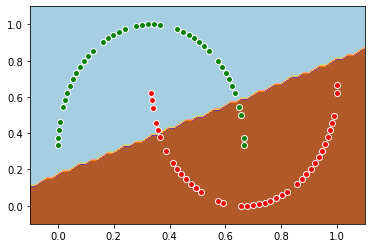

In [20]:
plot_decision_boundary(lr, (X_train, y_train))

### Multilayer Perceptron

In [21]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,), random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

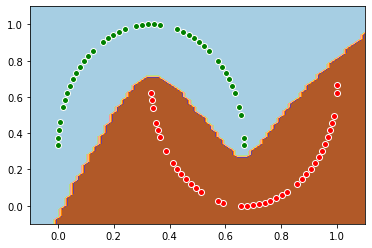

In [36]:
plot_decision_boundary(mlp, (X_train, y_train))